# Machine Learning Basics
In this module, you'll be implementing a simple Linear Regressor and Logistic Regressor. You will be using the Salary Data for the tasks in this module. <br> <br>
**Pipeline:**
* Acquiring the data - done
* Handling files and formats - done
* Data Analysis - done
* Prediction
* Analysing results

## Imports
You may require NumPy, pandas, matplotlib and scikit-learn for this module. Do not, however, use the inbuilt Linear and Logistic Regressors from scikit-learn.

In [116]:
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
from math import exp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split   
from sklearn.metrics import r2_score
from sklearn import metrics

## Dataset
You can load the dataset and perform any dataset related operations here. Split the data into training and testing sets. Do this separately for the regression and classification problems.

In [117]:
with open('SalaryData.txt','r'):
    txt=pd.read_csv('SalaryData.txt')
df=pd.DataFrame(txt)

In [126]:
year_lst=[]
salary_lst=[]
df1=pd.DataFrame()

for i in df["YearsExperience Salary"]:
    str1=str(i)
    year,salary=str1.split()
   
    year_lst.append(float(year))
    salary_lst.append(float(salary))

df1["Year"]=year_lst
df1["Salary"]=salary_lst

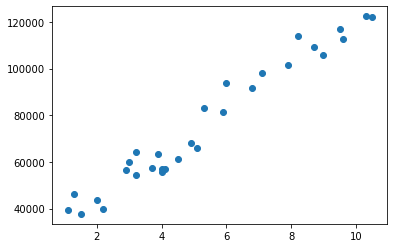

In [127]:
x=df1['Year']
y=df1['Salary']
plt.scatter(x,y)


In [128]:
x_train,x_test,y_train,ytest=train_test_split(x,y,random_state=12)

## Task 1a - Linear Regressor
Code your own Linear Regressor here, and fit it to your training data. You will be predicting salary based on years of experience.

In [153]:
X=np.array(x_train)
Y=np.array(y_train)

mean_x = np.mean(X)
mean_y = np.mean(Y)
n = len(X)
nur=0
dem=0
for i in range(n):
    nur += (X[i] - mean_x) * (Y[i] - mean_y)
    dem += (X[i] - mean_x) ** 2
    m = nur / dem
    c = mean_y - (m * mean_x)

max_x = np.max(X)
min_x = np.min(X) 
x1 = np.linspace(min_x, max_x, n)
y1 = c + m * x1


9385.833015776241

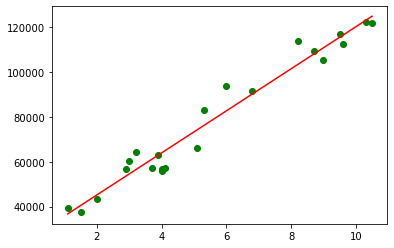

In [134]:
plt.plot(x1, y1, label='Regression Line',c="red")
plt.scatter(X, Y, label='Scatter Plot',c="green")

Evaluation of the Linear Regression Model:

In [154]:
XT=np.array(x_test)
xt=XT.reshape(-1,1)
YT=np.array(ytest)
yt=YT.reshape(-1,1)

In [172]:
y_p1=[]
for i in range(0,len(xt)):
    y_p=c+m*xt[i]
    y_p1.append(y_p)
print(f'MAE:{metrics.mean_absolute_error(yt,y_p1)}')
print(f'R2:{metrics.r2_score(yt,y_p1)}')
print(f'MSE:{metrics.mean_squared_error(yt,y_p1)}')
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(yt,y_p1))}')

MAE:4390.481327642708
R2:0.9411257758473123
MSE:27192964.63810624
RMSE:5214.687396010066


## Task 1b - Logistic Regression
Code your own Logistic Regressor here, and fit it to your training data. You will first have to create a column, 'Salary<60000', which contains '1' if salary is less than 60000 and '0' otherwise. This is your target variable, which you will aim to predict based on years of experience.

In [13]:
sal=df1['Salary']
year=df1['Year']

In [14]:
sal_arr=np.array(sal)
year_arr=np.array(year)
tar=[]
for i in range(0,len(sal_arr)):
    if sal_arr[i]<60000:
        tar.append(1)
    else:
        tar.append(0)

In [15]:
df1['Target']=tar
tt=df1['Target']

In [51]:
x_train1,x_test1,y_train1,y_test1=train_test_split(year,tt,random_state=2)

In [52]:
def normalize(X):
    return X - X.mean()

def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])


def logistic_regression(X, Y):

    X = normalize(X)

 
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 30

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  
       
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

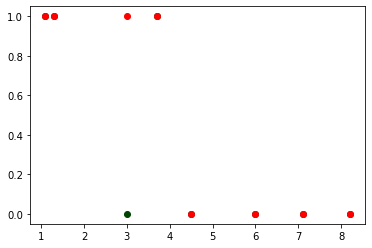

Accuracy = 0.875


In [53]:
b0, b1 = logistic_regression(x_train1, y_train1)


X_test_norm = normalize(x_test1)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(x_test1, y_test1,c="#040")
plt.scatter(x_test1, y_pred, c="red")
plt.show()

accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test1.iloc[i]:
        accuracy += 1


TASK-2:

In [55]:
"Logistic regressor"
print(f"Accuracy = {accuracy / len(y_pred)}")

Accuracy = 0.875
